In [1]:
function mullers_method(f, x0, x1, x2, tol=1e-10, max_iter=100)
    """
    Muller's method for finding roots of a function f(x).

    Parameters:
    - f: The function whose root is to be found.
    - x0, x1, x2: Initial guesses (three points).
    - tol: Tolerance for convergence (default: 1e-10).
    - max_iter: Maximum number of iterations (default: 100).

    Returns:
    - root: The approximate root of the function.
    - iterations: The number of iterations performed.
    """

    for i in 1:max_iter
        # Evaluate the function at the three points
        f0, f1, f2 = f(x0), f(x1), f(x2)

        # Compute differences
        h0 = x1 - x0
        h1 = x2 - x1
        δ0 = (f1 - f0) / h0
        δ1 = (f2 - f1) / h1

        # Compute coefficients of the quadratic polynomial
        a = (δ1 - δ0) / (h1 + h0)
        b = a * h1 + δ1
        c = f2

        # Compute the discriminant
        discriminant = sqrt(b^2 - 4 * a * c + 0im)  # Ensure complex sqrt

        # Choose the denominator with the larger magnitude
        denom = abs(b + discriminant) > abs(b - discriminant) ? (b + discriminant) : (b - discriminant)

        # Compute the next approximation
        dx = -2 * c / denom
        x3 = x2 + dx

        # Check for convergence
        if abs(dx) < tol
            return x3, i
        end

        # Update points for the next iteration
        x0, x1, x2 = x1, x2, x3
    end

    error("Muller's method did not converge within $max_iter iterations.")
end

mullers_method (generic function with 3 methods)

In [2]:
# Example usage
y = 1.3
f(q) = q^2 + im*y^2*q  - im*y^2  # Function whose root we want to find
x0, x1, x2 = -1.0-5.0im, 0.0+0.0im, 0.0-5im  # Initial guesses

# note: find the other solution with initial guesses: -1.0-2.0im , 0.0+0.0im, 1.0+2.0im

root, iterations = mullers_method(f, x0, x1, x2)
println("Root: $root")
println("Iterations: $iterations")

Root: -0.7485394339999749 - 1.9738650425329876im
Iterations: 2


In [3]:
# using DomainColoring, LaTeXStrings, CairoMakie

In [4]:
#=
dcplot = domaincolor(q -> q^2 + im*y^2*q  - im*y^2, (-2.5,2.5, -2.5, 1.5), abs=true, grid=true
)
=#
# save("dcplot.pdf", dcplot, backend=CairoMakie)

In [5]:
#=
x = -2:0.005:2
z = -3:0.005:1

y = 1.3
f(q) = q^2 + im*y^2*q  - im*y^2
fvals = [f(u + 1im * v) for u in x, v in z]
fvalues = abs.(fvals)
fargs = angle.(fvals)

fig = Figure(size=(900, 400), fontsize=20)
axs = [Axis(fig[1, j], aspect=1) for j in 1:2]
cmap = :plasma
contour!(axs[1], x, z, fargs, levels=30, colormap=cmap)
pltobj1 = heatmap!(axs[2], x, z, fargs, colorrange=(-π, π), colormap=cmap)
contour!(axs[2], x, z, fargs, levels=30, color=:white, linewidth=1)
Colorbar(fig[1, 3], pltobj1, ticks=([-π, -π / 2, 0, π / 2, π],
    [L"$-\pi$", L"$-\pi/2$", L"$0$", L"$\pi/2$", L"$\pi$"]))
limits!(axs[1], x[1], x[end], z[1], z[end])
fig
=#


In [6]:
y = LinRange(0, 3, 1000)

1000-element LinRange{Float64, Int64}:
 0.0, 0.003003, 0.00600601, 0.00900901, …, 2.99099, 2.99399, 2.997, 3.0

[ Info: Saved animation to /home/belster/JuliaFiles/CompMethods/rootfinding/complex_function.gif


Plots.AnimatedGif("/home/belster/JuliaFiles/CompMethods/rootfinding/complex_function.gif")
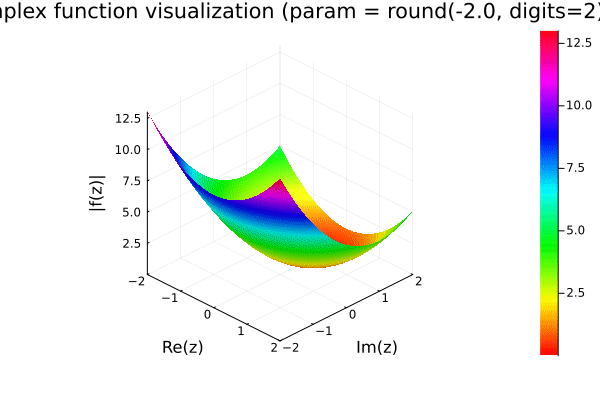

In [ ]:
using Plots
gr()  # Explicitly use GR backend

function create_complex_surface(f, xrange, yrange, param; 
                              nx=100, ny=100)
    x = range(xrange[1], xrange[2], length=nx)
    y = range(yrange[1], yrange[2], length=ny)
    
    # Calculate complex values
    z = [f(complex(x[i], y[j]), param) for i in 1:nx, j in 1:ny]
    
    # Extract magnitude for height
    heights = abs.(z)
    
    # Calculate phases for coloring (normalized to [0,1])
    phases = (angle.(z) .+ π) ./ (2π)
    
    # Create surface plot using Plots.surface
    Plots.surface(x, y, heights,
           color=phases,  # Use phases directly for coloring
           xlabel="Re(z)",
           ylabel="Im(z)",
           zlabel="|f(z)|",
           camera=(45, 30),  # Viewing angle
           colormap=:hsv,    # HSV colormap works well for phase visualization
           title="Complex function visualization (param = $param")
end

# Example usage with a parameterized complex function
f(z, a) = z^2 + a * z + 1

# Create animation for different parameter values
anim = @animate for a in range(-2, 2, length=50)
    create_complex_surface(f, (-2, 2), (-2, 2), a)
end

# Save animation
gif(anim, "complex_function.gif", fps=10)